In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
import time
import pandas as pd
import numpy as np
from sklearn import cross_validation as cv
from sklearn.metrics import mean_squared_error, f1_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn.cross_validation import KFold
from matplotlib import pyplot as plt

from joblib import Parallel, delayed

plt.style.use('ggplot')

In [78]:
wrapper_features = np.array([48, 43, 35, 53, 70, 55, 71, 73, 31, 33, 42, 65, 67, 64, 20, 32, 9, 22, 8, 17, 79, 28, 91, 49, 46, 2, 88, 93, 99, 98, 68, 97, 36, 83, 60, 30, 62, 66, 77, 72, 45, 86, 37, 21, 58, 3, 5, 69, 34, 1, 50, 57, 85, 19, 7, 63, 4, 96, 101, 47, 92, 54, 23, 89, 94, 25, 29, 51, 24, 76, 14, 90, 12, 80, 61, 13, 84, 26, 41, 0, 40, 95, 44, 100, 15, 6, 78, 27, 87, 52, 81, 18, 82, 56, 10, 39, 74, 16, 75, 11, 59])
wrapper_scores = np.array([0.84981641438383315, 0.87512082200124663, 0.89824164515601723, 0.91770852102308997,
                           0.92930721469068045, 0.93604291456324651, 0.94446708000965474, 0.95011746265741504,
                           0.95504831657409917, 0.96060246575355479, 0.96351819227585178, 0.96378990070172277,
                           0.96363609854910204, 0.96282826856382586, 0.96304690300762519, 0.96363488279481468,
                           0.96582842237919775, 0.96688254873665702, 0.96759597010230758, 0.96903377306717209,
                           0.97014789497772602, 0.97054160158591862, 0.97030997072483227, 0.97072940205647518,
                           0.97197904982704553, 0.97225854381650256, 0.97340782516879609, 0.97328392296013011,
                           0.97351901863338752, 0.97289136981652935, 0.97339141789258732, 0.97285066894497674,
                           0.97262783603014658, 0.97358025356550315, 0.97345836265843499, 0.97313674118285298,
                           0.97377250573553487, 0.97409579672443847, 0.97410118002220569, 0.97338399811760246,
                           0.97345818667491546, 0.97480039822404208, 0.9740751075622468, 0.97436920441265329,
                           0.97535247372412193, 0.97384439817832524, 0.97417511129234446, 0.97459535971973388,
                           0.97423135961786489, 0.97422526777956198, 0.97471554588091114, 0.97406159196973752,
                           0.97423392560683242, 0.97416199599147124, 0.97432066398428607, 0.97547572475587274,
                           0.97415450094086098, 0.9738366763856815, 0.9744167659398667, 0.97489508467225594,
                           0.97558255236394831, 0.97584448758191855, 0.97618829526910822, 0.97606341643062577,
                           0.97491811346041046, 0.97495663469224625, 0.97517108421332033, 0.97620205489079326,
                           0.97594067090695424, 0.97652722730948049, 0.97718988767435189, 0.97676471419482136,
                           0.97640483357269303, 0.97764110803673132, 0.97840210287620488, 0.97856404297883515,
                           0.97716503132059507, 0.97685160648170166, 0.97640736581959253, 0.97732022988884748,
                           0.97660612096181498, 0.97659616298640139, 0.97675662589465806, 0.97643725260917436,
                           0.97573597725766004, 0.97625800299241661, 0.97655838171231102, 0.97666582292293369,
                           0.97545945537132284, 0.97482023156451836, 0.97616812998425295, 0.9766392929031853,
                           0.97693174095879121, 0.97558341364230161, 0.97531993665355898, 0.97593065209420449,
                           0.97562547787535025, 0.97549903473715993, 0.97544095709790535, 0.97501145304123593, 0.975140832496874])
wrapper_times = np.array([12.916241884231567, 14.75527286529541, 20.01504397392273, 21.606812000274658, 23.143954038619995, 24.81272792816162, 27.971818923950195, 29.546644926071167, 33.049309968948364, 41.55557298660278, 41.5662899017334, 43.83678078651428, 43.096577882766724, 46.46142601966858, 52.89016795158386, 50.182724952697754, 49.938360929489136, 58.7648811340332, 62.671319007873535, 70.37928104400635, 79.67974400520325, 69.91913104057312, 70.01183199882507, 70.77176594734192, 75.40621709823608, 74.99198007583618, 76.29739809036255, 76.09849309921265, 77.64526915550232, 81.55233693122864, 77.2061059474945, 77.74500393867493, 82.94108700752258, 77.74895691871643, 82.38307595252991, 83.75122117996216, 80.74202489852905, 81.41215896606445, 77.31459093093872, 78.26889705657959, 79.17114996910095, 80.89346408843994, 85.58516097068787, 94.09372806549072, 98.28808403015137, 91.46679019927979, 84.31030201911926, 89.55524706840515, 90.32783913612366, 104.19161295890808, 86.88469409942627, 88.24910306930542, 99.43766403198242, 87.70302391052246, 81.17397093772888, 85.34214305877686, 88.55278897285461, 96.85995507240295, 86.8107168674469, 90.65663003921509, 83.46479511260986, 83.35990309715271, 75.89375495910645, 76.75582599639893, 75.98196196556091, 74.86085510253906, 74.08008790016174, 74.57580780982971, 82.11275100708008, 80.57064819335938, 77.17273783683777, 76.23712301254272, 68.75817799568176, 68.33296608924866, 66.8486909866333, 71.6332778930664, 72.48833394050598, 70.16552114486694, 57.56725311279297, 58.57362914085388, 56.919893980026245, 58.00561189651489, 53.4705970287323, 53.76406717300415, 52.9333279132843, 54.49473190307617, 43.34677600860596, 41.67347502708435, 39.844472885131836, 38.4742329120636, 37.28329586982727, 35.35762405395508, 35.57686710357666, 36.580073833465576, 22.839915990829468, 21.25005292892456, 19.32252311706543, 16.923949003219604, 14.244897842407227, 14.360015869140625, 14.291516065597534])

In [5]:
df = pd.read_csv("./spam.train.txt", delim_whitespace=True, header=None)
x_data = df.ix[:, 1:].as_matrix(); y_data = df.ix[:, 0].as_matrix()
x_train, x_data, y_train, y_data = cv.train_test_split(x_data, y_data,
                                                       test_size=0.25, random_state=288)

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

In [8]:
gbc = GradientBoostingClassifier(n_estimators=120, learning_rate=0.6)

In [9]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(init=None, learning_rate=0.6, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=120,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
from src.cfs import cfs, cfs1
from src.benchmark import fset2scores

In [52]:
cfs1_features = cfs1(x_train, y_train, x_train.shape[1])

In [53]:
_, cfs1_scores, cfs1_times = fset2scores(cfs1_features, x_train, x_test, y_train, y_test)

In [54]:
cfs_features = cfs(x_train, y_train, x_train.shape[1])

In [55]:
_, cfs_scores, cfs_times = fset2scores(cfs_features, x_train, x_test, y_train, y_test)

In [56]:
embedded_features = np.argsort(gbc.feature_importances_)[::-1]

In [57]:
_, embedded_scores, embedded_times = fset2scores(embedded_features, x_train, x_test, y_train, y_test)

In [81]:
wrapper_features = np.load('./hw2_files/wrapper_gbc.dat.npz')["features"]
wrapper_scores = np.load('./hw2_files/wrapper_gbc.dat.npz')["scores"]
wrapper_times = np.load('./hw2_files/wrapper_gbc.dat.npz')["times"]

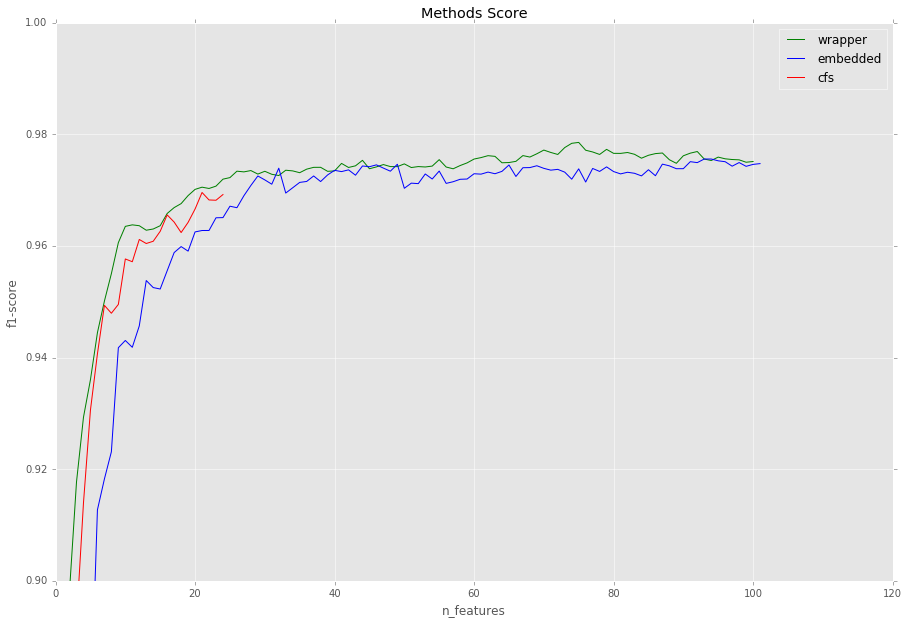

In [82]:
fig = plt.figure(figsize=(15, 10))
plt.plot(range(len(wrapper_features)), wrapper_scores, 'g', label="wrapper")
plt.plot(range(len(embedded_features)), embedded_scores, 'b', label="embedded")
plt.plot(range(len(cfs_features)), cfs_scores, 'r', label="cfs")
# plt.plot(range(len(cfs1_features)), cfs1_scores, 'y', label="cfs1")

plt.title('Methods Score')

plt.xlabel('n_features')
plt.ylabel('f1-score')
plt.legend(loc='upper right')
plt.ylim([0.9, 1.0])
fig.savefig('./hw2_files/scores_all_in_one.png')

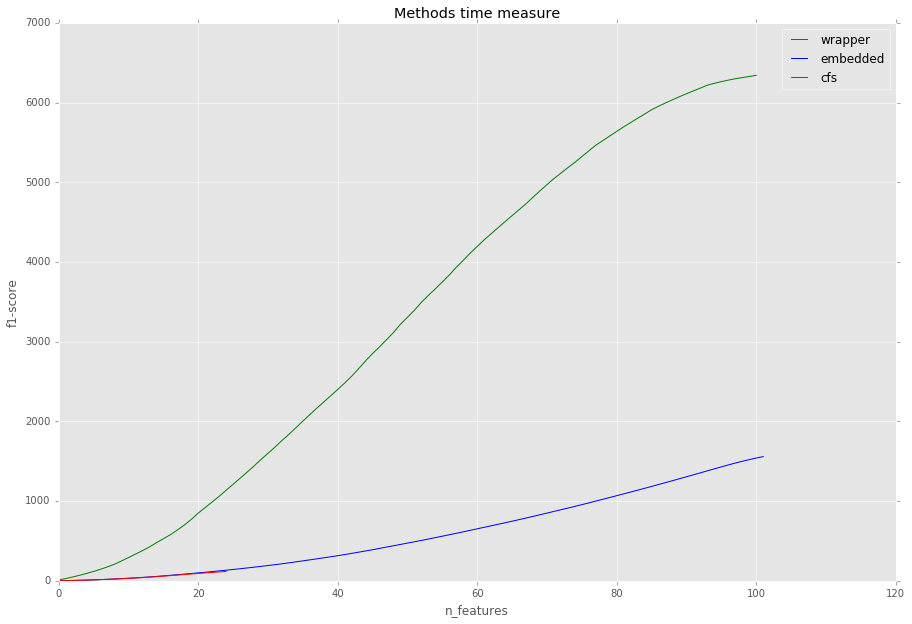

In [84]:
fig = plt.figure(figsize=(15, 10))
plt.plot(range(len(wrapper_features)), np.cumsum(wrapper_times), 'g', label="wrapper")
plt.plot(range(len(embedded_features)), np.cumsum(embedded_times), 'b', label="embedded")
plt.plot(range(len(cfs_features)), np.cumsum(cfs_times), 'r', label="cfs")
# plt.plot(range(len(cfs1_features)), np.cumsum(cfs1_times), 'y', label="cfs1")
plt.title('Methods time measure')

plt.xlabel('n_features')
plt.ylabel('f1-score')
plt.legend(loc='upper right')
fig.savefig('./hw2_files/times_all_in_one.png')